### Case-1: Only used Convolution and MaxPooling (epochs-50)
Model Accuracy- Not more than <b>75%</b>

### Case-2: Used Batch Normalization and Dropout(only after MaxPooling)(epochs-50)
Model Accuracy- Not more than <b>79%</b>

### Case-3: Used Dropout after each BN but not after MaxPooling
Model Accuracy-  Below<b> 80%</b>

### Case-4: Used L2 and LR
Model Accuracy- <b>81.10%(max)</b>

### Case-5: Used BN, Dropout, LR, L2, ImageNormalization
Model Accuracy- <b>82.15%(max)</b>

## Importing Keras Libraries and Modules


In [0]:
from keras import backend as K
import numpy as np
import time
# Importing matplot library
import matplotlib.pyplot as plt
% matplotlib inline
# Seed the generator
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam

##Importing Cifar10 dataset

In [0]:
# Importing Cifar10 dataset
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

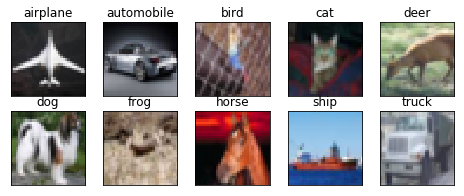

In [99]:
# Ploting each class from cifar10 dataset
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Function to plot model history
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Function to define accuracy
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Case-2: Used Batch Normalization and Dropout(only after MaxPooling)(epochs-50)
# Define the model

model = Sequential()

model.add(Convolution2D(48, 3, 3, activation='relu', input_shape=(32, 32, 3))) #30
model.add(BatchNormalization())
model.add(Convolution2D(48, 3, 3, activation='relu')) #28
model.add(BatchNormalization())
model.add(Convolution2D(48, 3, 3, activation='relu')) #26
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #13
model.add(Dropout(0.1))


model.add(Convolution2D(96, 3, 3, activation='relu')) # 11
model.add(BatchNormalization())
model.add(Convolution2D(96, 3, 3, activation='relu')) # 09
model.add(BatchNormalization())
model.add(Convolution2D(96, 3, 3, activation='relu')) # 07
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(192, 3, 3, activation='relu')) #05
model.add(BatchNormalization())
model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of model
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", input_shape=(32, 32, 3...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_217 (Conv2D)          (None, 30, 30, 48)        1344      
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 28, 28, 48)        20784     
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 48)        192       
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 26, 26, 48)        20784     
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 48)        192       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 13, 13, 48)        0         
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 29s 577us/step - loss: 1.4061 - acc: 0.5019 - val_loss: 1.2230 - val_acc: 0.5706
Epoch 2/50
50000/50000 [==============================] - 25s 504us/step - loss: 0.9643 - acc: 0.6585 - val_loss: 0.9434 - val_acc: 0.6756
Epoch 3/50
50000/50000 [==============================] - 25s 504us/step - loss: 0.7873 - acc: 0.7224 - val_loss: 0.8771 - val_acc: 0.6984
Epoch 4/50
50000/50000 [==============================] - 25s 504us/step - loss: 0.6740 - acc: 0.7641 - val_loss: 0.8694 - val_acc: 0.7076
Epoch 5/50
50000/50000 [==============================] - 25s 504us/step - loss: 0.5874 - acc: 0.7950 - val_loss: 0.7642 - val_acc: 0.7391
Epoch 6/50
50000/50000 [==============================] - 25s 505us/step - loss: 0.5161 - acc: 0.8189 - val_loss: 0.7484 - val_acc: 0.7502
Epoch 7/50
50000/50000 [==============================] - 25s 503us/step - loss: 0.4573 - acc: 0.8403 - val_loss: 0.

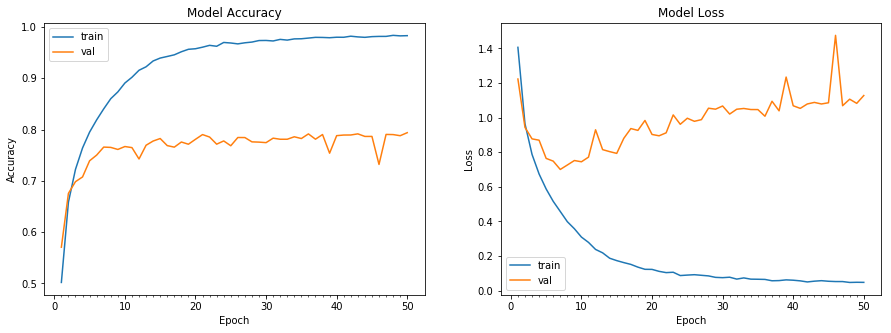

Accuracy on test data is: 79.39


In [0]:
# train the model
start = time.time()
# Train the model
                          
model_info = model.fit(train_features, train_labels, batch_size=128, epochs=50, verbose=1, validation_data=(test_features, test_labels))
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Case-3: Used Dropout after each BN but not after MaxPooling
# Define the model
model = Sequential()

model.add(Convolution2D(48, 3, 3, activation='relu', input_shape=(32, 32, 3))) #30
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(48, 3, 3, activation='relu')) #28
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(48, 3, 3, activation='relu')) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #13


model.add(Convolution2D(96, 3, 3, activation='relu')) # 11
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(96, 3, 3, activation='relu')) # 09
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(96, 3, 3, activation='relu')) # 07
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(192, 3, 3, activation='relu')) #05
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of model
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", input_shape=(32, 32, 3...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu")`
/usr/local/lib

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_233 (Conv2D)          (None, 30, 30, 48)        1344      
_________________________________________________________________
batch_normalization_22 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 28, 28, 48)        20784     
_________________________________________________________________
batch_normalization_23 (Batc (None, 28, 28, 48)        192       
_________________________________________________________________
dropout_13 (Dropout)         (None, 28, 28, 48)        0         
_________________________________________________________________
conv2d_235 (Conv2D)          (None, 26, 26, 48)        20784     
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 31s 623us/step - loss: 1.5507 - acc: 0.4529 - val_loss: 1.8669 - val_acc: 0.4091
Epoch 2/50
50000/50000 [==============================] - 26s 527us/step - loss: 1.1015 - acc: 0.6119 - val_loss: 1.1714 - val_acc: 0.5957
Epoch 3/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.9129 - acc: 0.6780 - val_loss: 1.0545 - val_acc: 0.6369
Epoch 4/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.7825 - acc: 0.7236 - val_loss: 1.1690 - val_acc: 0.6291
Epoch 5/50
50000/50000 [==============================] - 26s 526us/step - loss: 0.6997 - acc: 0.7537 - val_loss: 0.8240 - val_acc: 0.7196
Epoch 6/50
50000/50000 [==============================] - 26s 526us/step - loss: 0.6256 - acc: 0.7794 - val_loss: 0.8570 - val_acc: 0.7052
Epoch 7/50
50000/50000 [==============================] - 26s 526us/step - loss: 0.5654 - acc: 0.8006 - val_loss: 0.

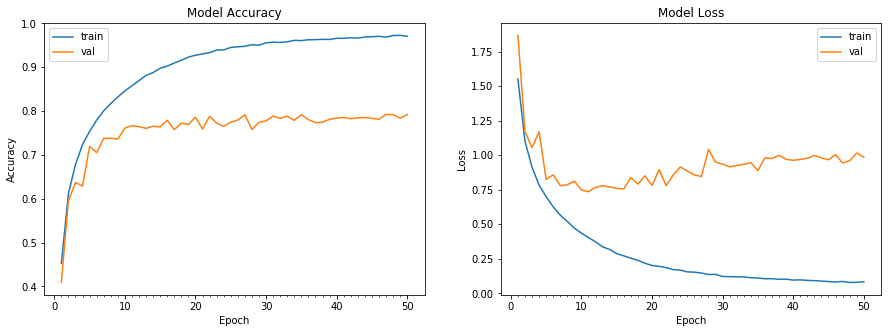

Accuracy on test data is: 79.21


In [0]:
# train the model
start = time.time()
# Train the model
                          
model_info = model.fit(train_features, train_labels, batch_size=256, epochs=50, verbose=1, validation_data=(test_features, test_labels))
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [108]:
# Case-4: Used L2 and LR
# Define the model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.regularizers import l2
model = Sequential()
model.add(Convolution2D(48, 3, 3, activation='relu', kernel_regularizer=l2(0.01), input_shape=(32, 32, 3))) #30
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(48, 3, 3, activation='relu', kernel_regularizer=l2(0.01))) #28
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(48, 3, 3, activation='relu', kernel_regularizer=l2(0.01))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #13


model.add(Convolution2D(96, 3, 3, activation='relu', kernel_regularizer=l2(0.01))) # 11
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(96, 3, 3, activation='relu', kernel_regularizer=l2(0.01))) # 09
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(96, 3, 3, activation='relu', kernel_regularizer=l2(0.01))) # 07
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(192, 3, 3, activation='relu', kernel_regularizer=l2(0.01))) #05
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

# Compile model
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of model
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_287 (Conv2D)          (None, 30, 30, 48)        1344      
_________________________________________________________________
batch_normalization_67 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_57 (Dropout)         (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_288 (Conv2D)          (None, 28, 28, 48)        20784     
_________________________________________________________________
batch_normalization_68 (Batc (None, 28, 28, 48)        192       
_________________________________________________________________
dropout_58 (Dropout)         (None, 28, 28, 48)        0         
_________________________________________________________________
conv2d_289 (Conv2D)          (None, 26, 26, 48)        20784     
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
50000/50000 [==============================] - 42s 846us/step - loss: 3.1543 - acc: 0.4460 - val_loss: 2.3802 - val_acc: 0.3389
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
50000/50000 [==============================] - 33s 665us/step - loss: 1.7205 - acc: 0.5725 - val_loss: 2.0966 - val_acc: 0.4462
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
50000/50000 [==============================] - 33s 663us/step - loss: 1.6021 - acc: 0.6103 - val_loss: 2.2787 - val_acc: 0.4432
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
50000/50000 [==============================] - 33s 662us/step - loss: 1.5207 - acc: 0.6317 - val_loss: 1.7478 - val_acc: 0.5499
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
50000/50000 [==

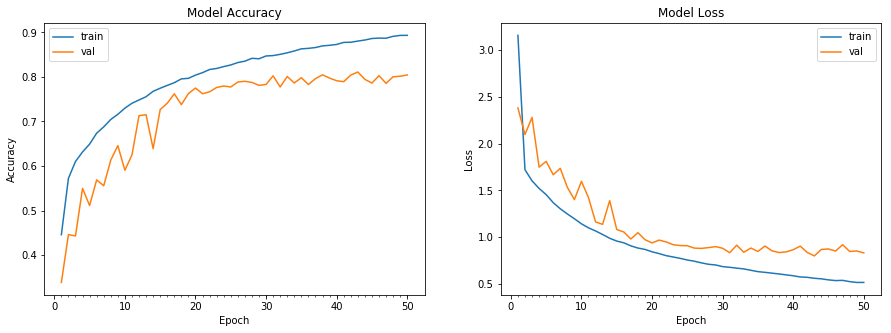

Accuracy on test data is: 80.44


In [109]:
# train the model
start = time.time()
# Train the model
                          
model_info = model.fit(train_features, train_labels, batch_size=128, epochs=50, 
                       validation_data=(test_features, test_labels), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [144]:
# Case-5: BN, Dropout, LR, L2, Image Normalization
# Define the model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.regularizers import l2

model = Sequential()

model.add(Convolution2D(48, 3, 3, activation='relu',kernel_regularizer=l2(0.01), input_shape=(32, 32, 3))) #30
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(48, 3, 3, activation='relu',kernel_regularizer=l2(0.01))) #28
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(48, 3, 3, activation='relu',kernel_regularizer=l2(0.01))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #13


model.add(Convolution2D(96, 3, 3, activation='relu',kernel_regularizer=l2(0.01))) # 11
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(96, 3, 3, activation='relu',kernel_regularizer=l2(0.01))) # 09
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(96, 3, 3, activation='relu',kernel_regularizer=l2(0.01))) # 07
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(192, 7)) #01
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1)) #01

model.add(Flatten())
model.add(Activation('softmax'))

# Compile model
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of model
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Co

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_366 (Conv2D)          (None, 30, 30, 48)        1344      
_________________________________________________________________
batch_normalization_131 (Bat (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_121 (Dropout)        (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_367 (Conv2D)          (None, 28, 28, 48)        20784     
_________________________________________________________________
batch_normalization_132 (Bat (None, 28, 28, 48)        192       
_________________________________________________________________
dropout_122 (Dropout)        (None, 28, 28, 48)        0         
_________________________________________________________________
conv2d_368 (Conv2D)          (None, 26, 26, 48)        20784     
__________

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
391/391 [==============================] - 51s 130ms/step - loss: 2.5686 - acc: 0.4809 - val_loss: 2.0235 - val_acc: 0.4032
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
391/391 [==============================] - 34s 87ms/step - loss: 1.4859 - acc: 0.6068 - val_loss: 2.0237 - val_acc: 0.4526
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
391/391 [==============================] - 34s 87ms/step - loss: 1.3557 - acc: 0.6481 - val_loss: 1.5273 - val_acc: 0.5828
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
391/391 [==============================] - 34s 87ms/step - loss: 1.2664 - acc: 0.6712 - val_loss: 1.4410 - val_acc: 0.6180
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
391/391 [==============================] - 34s 87ms/step - loss: 1.2008 - acc: 0.691

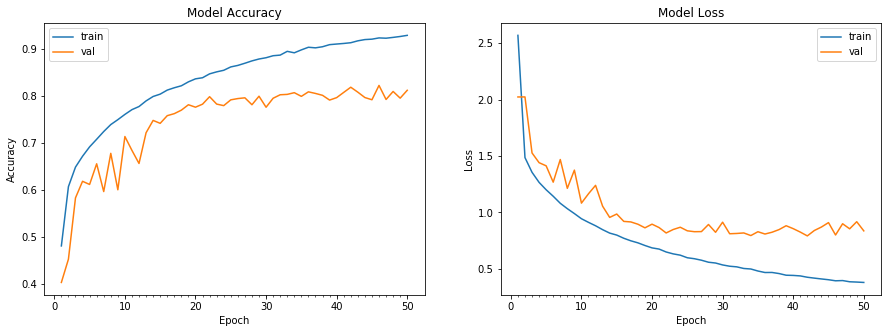

Accuracy on test data is: 81.13


In [145]:
# Image Normalization
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False)
train_iterator = datagen.flow(train_features, train_labels, batch_size=128,shuffle=True)
test_iterator =  datagen.flow(test_features, test_labels, batch_size=128,shuffle=True)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(train_iterator,steps_per_epoch=int(np.ceil(len(train_features)/128)),epochs=50, verbose=1, 
                    validation_data=test_iterator,validation_steps = int(np.ceil(len(test_features)/128)), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))